In [1]:
import pandas as pd
import sys
import os
sys.path.append("..")

data = pd.read_csv("../data/TSLA_historical_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3545 non-null   object 
 1   Open          3545 non-null   float64
 2   High          3545 non-null   float64
 3   Low           3545 non-null   float64
 4   Close         3545 non-null   float64
 5   Adj Close     3545 non-null   float64
 6   Volume        3545 non-null   int64  
 7   Dividends     3545 non-null   float64
 8   Stock Splits  3545 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 249.4+ KB


In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [3]:
# Function to handle missing values
def handle_missing_values(data):
    data = data.ffill()  
    return data

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0


In [4]:
def analyze_statistics(data, columns):
    print(f"Statistics for TSLA:")
    print(data[columns].describe())

analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

Statistics for TSLA:
              Open         High          Low    Adj Close        Close  \
count  3545.000000  3545.000000  3545.000000  3545.000000  3545.000000   
mean     75.505658    77.159237    73.743492    75.487264    75.487264   
std     102.530489   104.806516   100.051787   102.456615   102.456615   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.516667    11.861333    11.216667    11.565333    11.565333   
50%      17.463333    17.688667    17.100000    17.459333    17.459333   
75%     161.880005   165.333328   158.360001   161.479996   161.479996   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.545000e+03  
mean   9.699708e+07  
std    7.866828e+07  
min    1.777500e+06  
25%    4.770600e+07  
50%    8.250600e+07  
75%    1.228890e+08  
max    9.140820e+08  


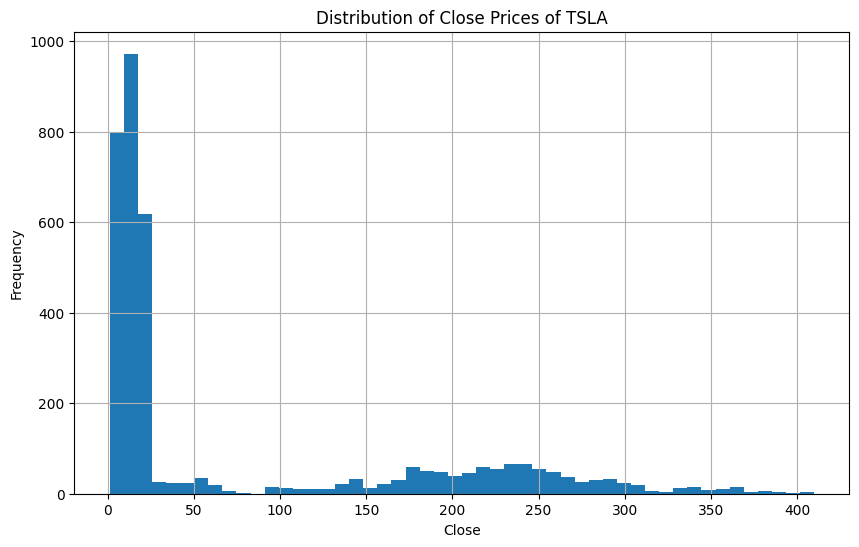

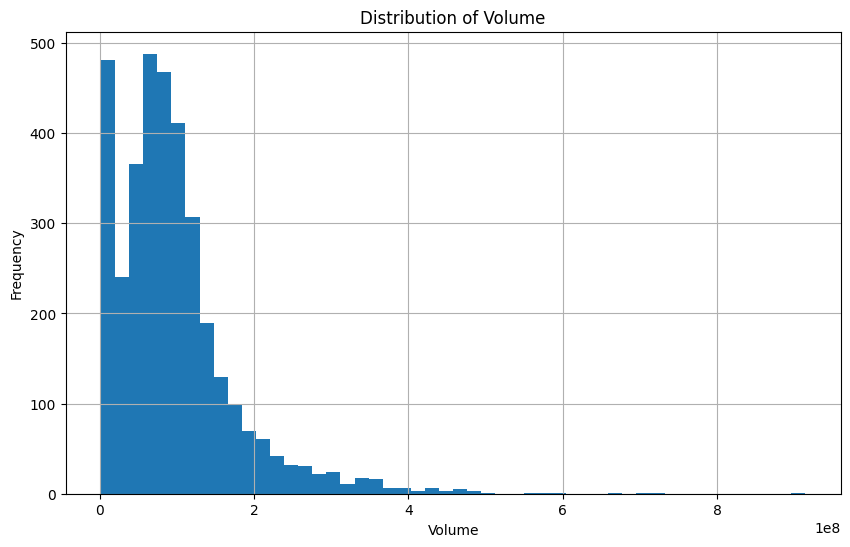

In [5]:
import matplotlib.pyplot as plt

def plot_distributions(data, column, bins=50, title="Distribution"):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_distributions(data, 'Close', title="Distribution of Close Prices of TSLA")
plot_distributions(data, 'Volume', title="Distribution of Volume")


Correlation Matrix for TSLA:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999724  0.999626   0.999219  0.999219  0.105546
High       0.999724  1.000000  0.999633   0.999650  0.999650  0.109179
Low        0.999626  0.999633  1.000000   0.999687  0.999687  0.102287
Adj Close  0.999219  0.999650  0.999687   1.000000  1.000000  0.106500
Close      0.999219  0.999650  0.999687   1.000000  1.000000  0.106500
Volume     0.105546  0.109179  0.102287   0.106500  0.106500  1.000000


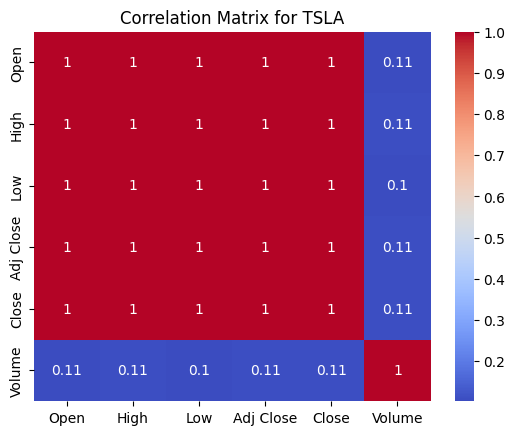

In [6]:
import seaborn as sns

def analyze_correlations(data, columns):
    correlation_matrix = data[columns].corr()
    print(f"\nCorrelation Matrix for TSLA:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for TSLA")
    plt.show()
    
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

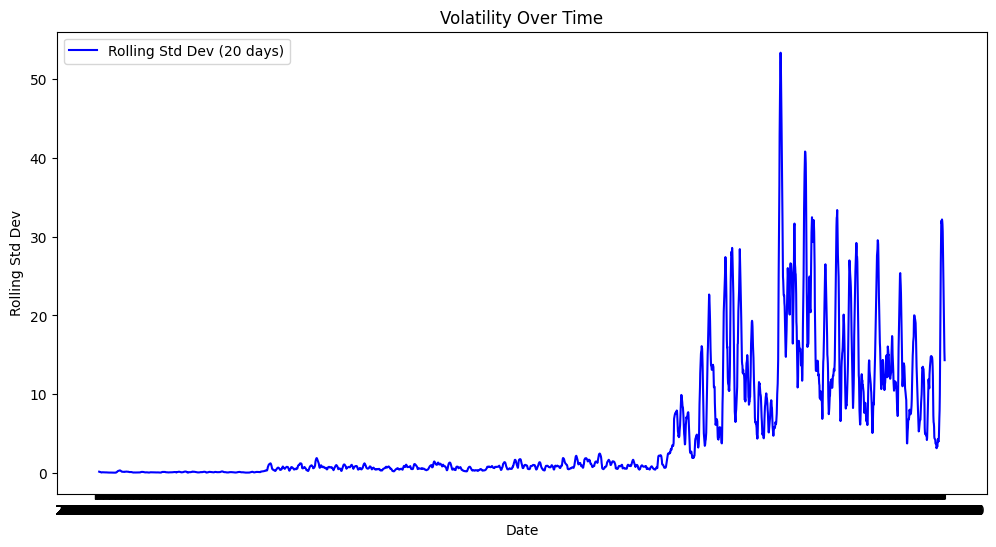

In [7]:
# Function to study volatility
def plot_volatility(data, value_col, date_col, window=20):
    data['Rolling_Std'] = data[value_col].rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data['Rolling_Std'], label=f"Rolling Std Dev ({window} days)", color='blue')
    plt.title("Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Rolling Std Dev")
    plt.legend()
    plt.show()

plot_volatility(data, 'Close', 'Date')

In [8]:
import pandas as pd
import talib as ta

import sys
import os
from IPython.display import display

# Load the stock data loader script
sys.path.append(os.path.abspath('./scripts'))
from scripts.load_stock_data import load_stock_data

# List of company names
company_names = ['TSLA']

# Dictionary to store stock data
stock_data = {}

# Load data for company
for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')

# Define your apply_technical_indicators function
def apply_technical_indicators(df):
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                              fastperiod=12, 
                                                              slowperiod=26, 
                                                              signalperiod=9)
    return df

# Apply technical indicators to company's data
for company, data in stock_data.items():
    stock_data[company] = apply_technical_indicators(data)

# Display the first few rows of the data for company
for company, data in stock_data.items():
    print(f"--- {company} ---")
    display(data.head())

--- TSLA ---


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,NaN,NaN,NaN,NaN,NaN


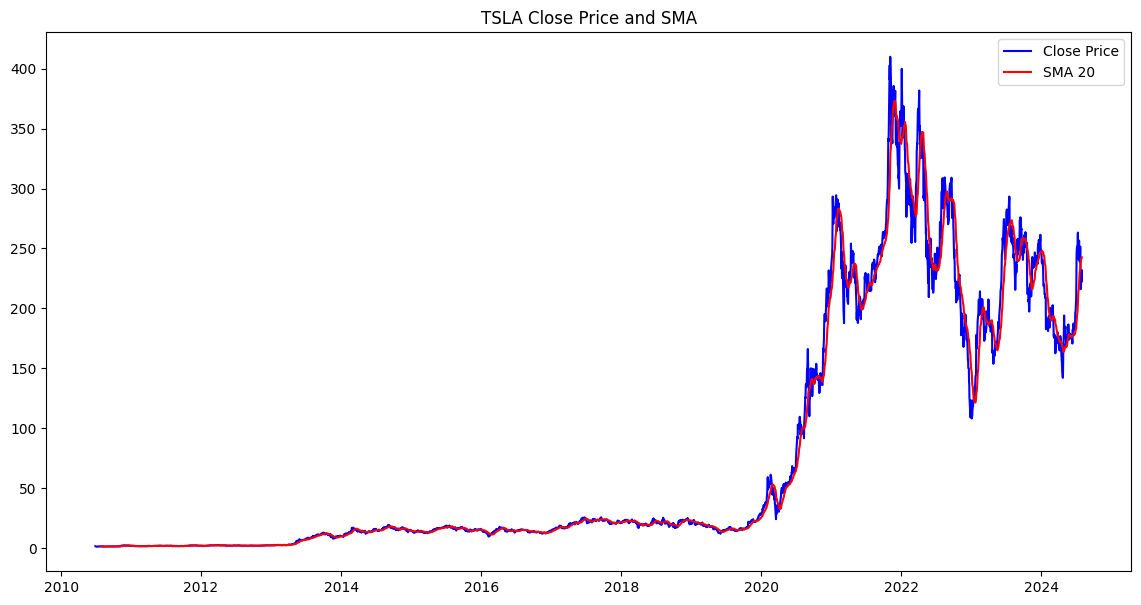

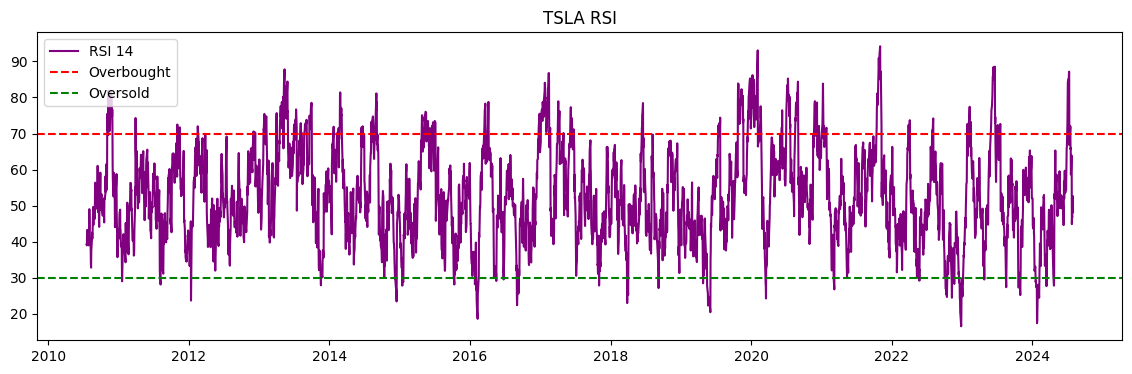

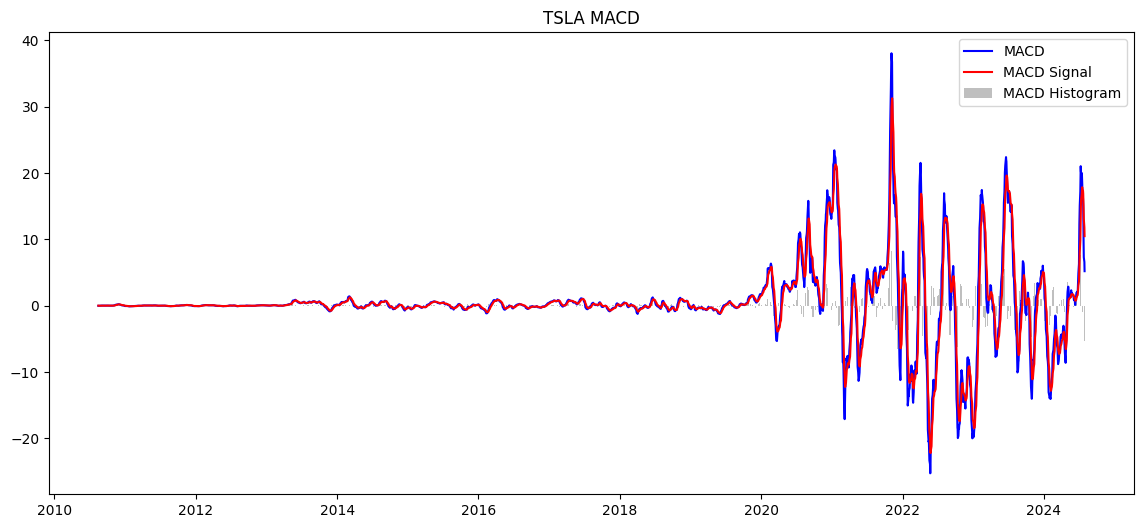

In [9]:
import matplotlib.pyplot as plt

# Choose a company to plot (e.g., 'AAPL')
company_to_plot = 'TSLA'
data = stock_data[company_to_plot]

# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='SMA 20', color='red')
plt.title(f'{company_to_plot} Close Price and SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{company_to_plot} RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title(f'{company_to_plot} MACD')
plt.legend()
plt.show()

In [10]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

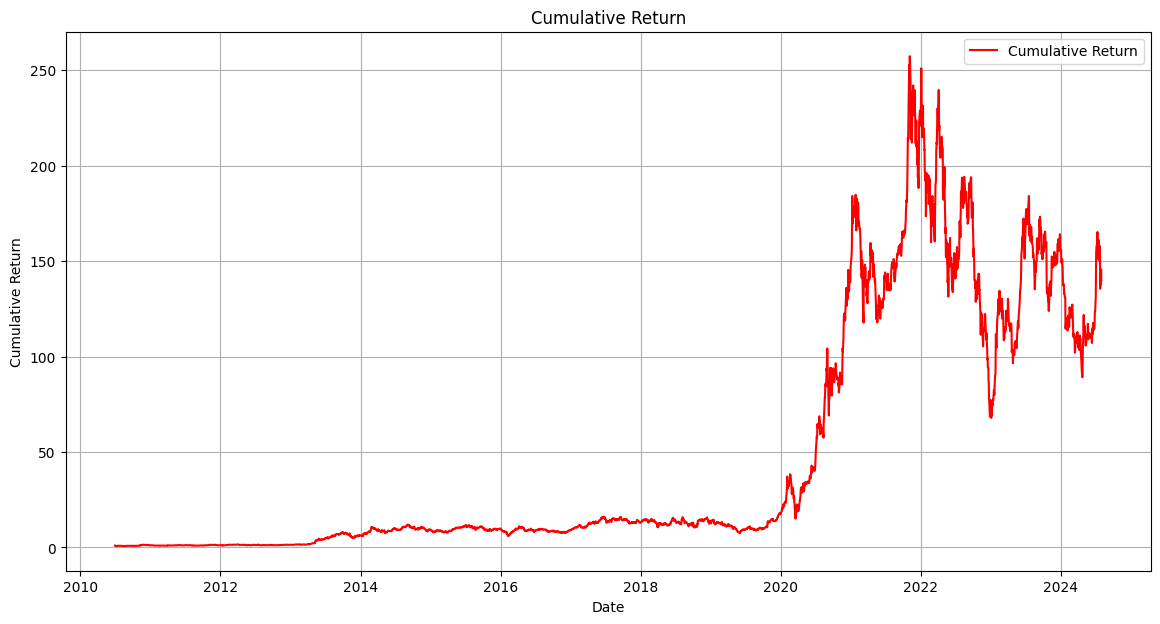

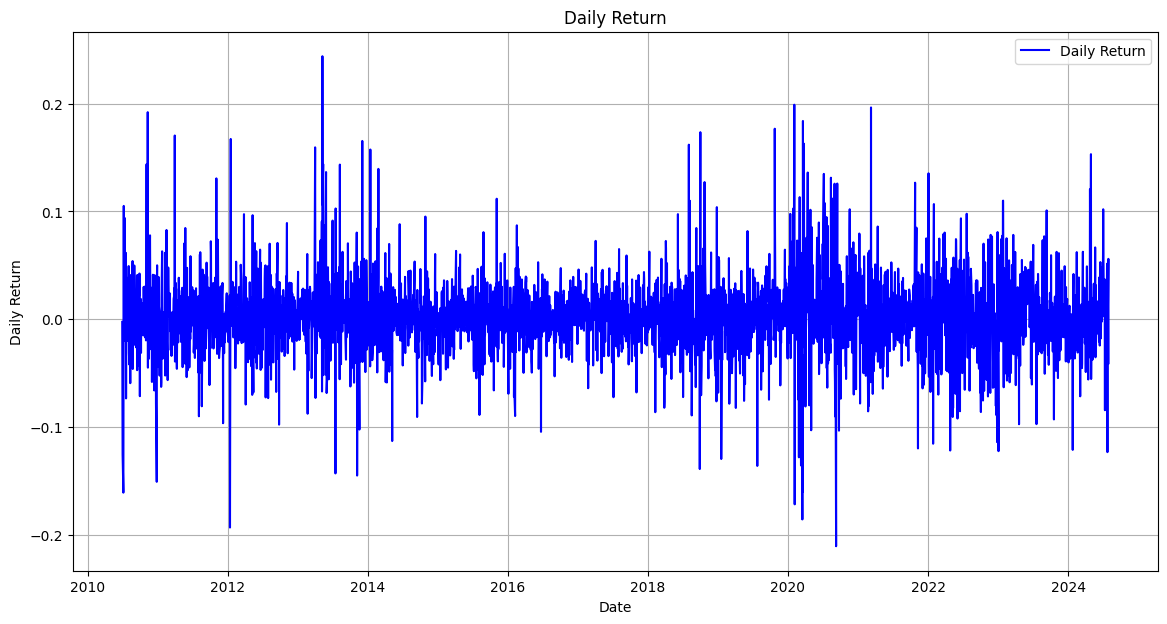

In [11]:
# Ensure 'Date' is a column and properly formatted
data.reset_index(inplace=True)  # Converts index to a column if 'Date' is in the index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure it's in datetime format

# Define the plotting function
def plot_financial_metrics(data):
    """Plot daily returns and cumulative returns."""
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='red')
    plt.title('Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
    plt.title('Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_financial_metrics(data)